In [84]:
import numpy as np 
import time
import scipy
from astropy import units
from matplotlib import pyplot as plt
from galpy.orbit import Orbit
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd
from galpy.util.bovy_coords import rect_to_cyl_vec
from galpy.util.bovy_coords import rect_to_cyl
from galpy.potential import PowerSphericalPotential
from scipy.spatial import KDTree
from astropy import units

In [85]:
data = pd.read_csv('full1.csv')
fullset = np.array(data)

In [86]:
ras = (np.array(data))[:,0]*u.deg
decs = (np.array(data))[:,1]*u.deg
pmras = (np.array(data))[:,2]*u.mas/u.yr
pmdecs = (np.array(data))[:,3]*u.mas/u.yr
dists = np.abs(1/((np.array(data))[:,5]))*u.kpc
vloss = (np.array(data))[:,4]*u.km/u.s

In [87]:
co= SkyCoord(ra=ras,dec=decs,distance=dists,
                 pm_ra_cosdec=pmras,pm_dec=pmdecs,
                 radial_velocity=vloss,
                 frame='icrs')

o= Orbit(co)

In [88]:
dist = np.sqrt(((o.x())-8)**2+o.y()**2)

oc = o[dist <= 0.125]

print(len(oc))

28789


Text(0, 0.5, 'y position')

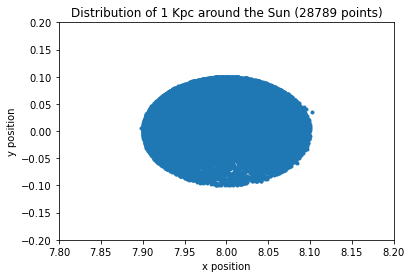

In [89]:
plt.plot(oc.x(), oc.y(), '.')
plt.title("Distribution of 1 Kpc around the Sun (28789 points)" )
plt.xlabel('x position')
plt.xlim(7.8, 8.2)
plt.ylim(-0.2, 0.2)
plt.ylabel('y position')

(array([14890.,   335.,   176.,   110.,    98.,    65.,    63.,    49.,
           50.,    36.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

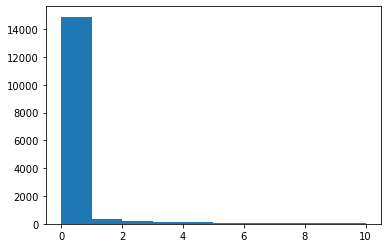

In [90]:
plt.hist(o.dist()*np.cos(o.bb()), range = (0, 10))

Text(0, 0.5, 'y position')

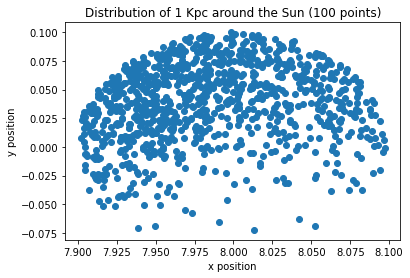

In [91]:
n = 1000
op = oc[0:n]
opp = oc[0:n]

plt.plot(op.x(), op.y(), 'o')
plt.title('Distribution of 1 Kpc around the Sun (100 points)')
plt.xlabel('x position')
plt.ylabel('y position')

In [92]:
def lp(a):
    return PowerSphericalPotential(amp=1.,alpha=a,normalize=True,r1=1.,ro=None,vo=None)

In [93]:
def alphafinder(a):
    alpha = a[0]
    print(a[0])
    g = lp(alpha)
    print(g)
    ts = np.linspace(0.,100.,1001)
    op.integrate(ts, g)

    voronoi = [ [] for i in range(n)]
    x1 = opp.x()
    y1 = opp.y()

    for k in range(len(op.x(ts))):

        x2 = op.x(ts)[:,k]
        y2 = op.y(ts)[:,k]

        tree = KDTree(np.c_[x1.ravel(), y1.ravel()])

        ab = np.zeros([n, 2])
        for i in range(len(x2)):
            ab[i] = [x2[i], y2[i]]
    
        dd, ii = tree.query(ab, k=1)

        for i in range(len(ii)):
            voronoi[ii[i]].append(1)  
            
    prob = [ [] for i in range(n)]
    prob = [len(voronoi[i])/n for i in range(len(voronoi))]

    loggedvoronoi = []
    loggedvoronoi = [np.log(prob[i]) for i in range(len(voronoi)) if prob[i] != 0]
        
    Sum = np.sum(loggedvoronoi)
    return (Sum) 


0
1
2
3
4
[-5273.625218697237, -6442.502681392429, -6449.811590741776, -4911.095935770447, -6678.120305685262]
[0 1 2 3 4]


Text(0.5, 1.0, 'Best Fitted Alpha')

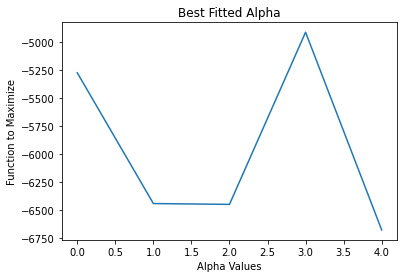

In [94]:
a = np.arange(0, 5)
emp = np.array(((0,)*len(a)), float)
emp = [alphafinder([alpha]) for alpha in a]

print(emp)
print(a)
plt.plot(a, emp)
plt.xlabel('Alpha Values')
plt.ylabel('Function to Maximize')
plt.title('Best Fitted Alpha')

In [ ]:
#scipy tree 
#initialize tree with grid points
#and then give the query all the other points 
#gives back an array of closest points 
#index array for each point 
#histogram 
#run that through the tree 
#after integrating all the instances 